In [1]:
import cv2
import numpy as np
import sys
import glob
import math
import time
import os
from skimage import measure
from skimage.io import imread
from skimage.measure import regionprops
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

In [15]:
car_image = imread("frame1475.jpg", as_grey=True)
# it should be a 2 dimensional array
print(car_image.shape)

(720, 1280)


(720, 1280)


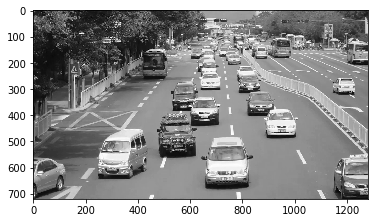

In [16]:
gray_car_image = car_image * 255
plt.imshow(gray_car_image, cmap="gray")
print(car_image.shape)

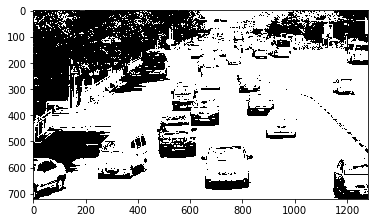

In [17]:
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > threshold_value
plt.imshow(binary_car_image, cmap="gray")

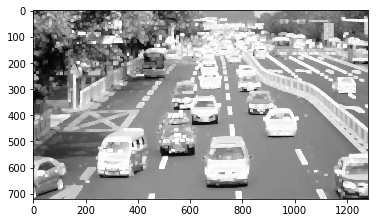

In [18]:
kernel = np.ones((9,9),np.uint8)
dilation = cv2.dilate(gray_car_image,kernel,iterations = 1)
plt.imshow(dilation, cmap="gray")

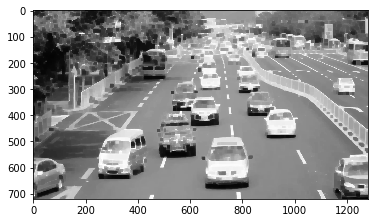

In [19]:
erosion = cv2.erode(dilation,kernel,iterations = 1)
plt.imshow(erosion, cmap="gray")

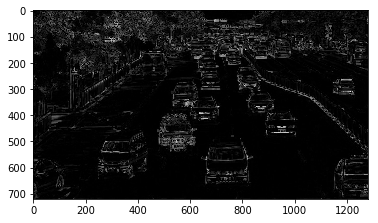

In [20]:
diff_image= erosion-gray_car_image
plt.imshow(diff_image, cmap="gray")

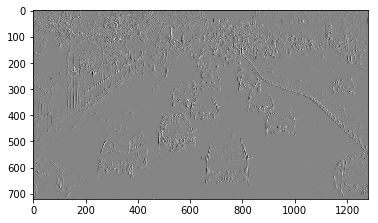

In [21]:
sobel_horizontal = cv2.Sobel(diff_image, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobel_horizontal, cmap="binary")

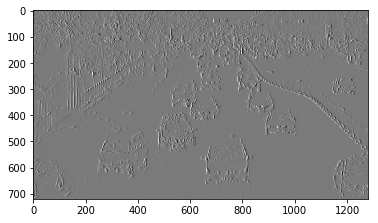

In [22]:
blur = cv2.GaussianBlur(sobel_horizontal,(5,5),0)
#ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(blur, cmap="gray")

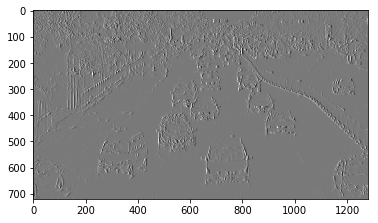

In [23]:
closing = cv2.morphologyEx(blur, cv2.MORPH_CLOSE, (3,9))
plt.imshow(closing, cmap="gray")

(720, 1280)


dtype('uint8')

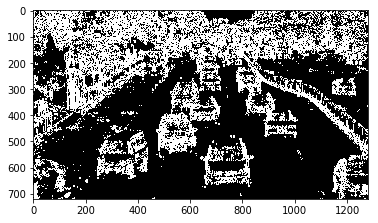

In [24]:
closing=cv2.convertScaleAbs(closing)
ret2,thresh = cv2.threshold(closing,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")
print(thresh.shape)
thresh.dtype
#thresh=cv2.convertScaleAbs(thresh)

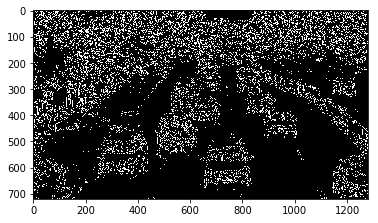

In [25]:
canny_image = cv2.Canny(thresh,250,255)
plt.imshow(canny_image, cmap="gray")
#im3, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
#plt.imshow(im3, cmap="gray")

In [26]:
w,h,x,y = 0,0,0,0
plate_objects_cordinates = []
plate_like_objects = []
for contour in contours:
        area = cv2.contourArea(contour)
        if area > 6000 and area < 40000:
                [x,y,w,h] = cv2.boundingRect(contour)
        if w > 100 and w < 200 and h > 60 and h < 100:
                plate_like_objects.append([x,y,w,h])
                rectBorder = patches.Rectangle((x, y), h-y, w-x, edgecolor="red", linewidth=2, fill=False)
                ax1.add_patch(rectBorder)
plt.show()

NameError: name 'contours' is not defined

In [27]:
final=cv2.drawContours(car_image, contours, -1, (0,255,0), 3)
plt.imshow(final, cmap="gray")

NameError: name 'contours' is not defined